In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Ridge, LinearRegression, ElasticNet, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [116]:
# importing the dataset and reading it into dataframe, dropping out the date, and classes for they are irrelevant for this prediction
file_path = '/content/Algerian_forest_fires_cleaned.csv'

df = pd.read_csv(file_path)
df.drop(columns=['day', 'month', 'year', 'Classes', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Region'], inplace=True)
df.head()

,Temperature,RH,Ws,FWI
0,29,57,18,0.5
1,29,61,13,0.4
2,26,82,22,0.1
3,25,89,13,0.0
4,27,77,16,0.5


In [117]:
df.describe()

,Temperature,RH,Ws,FWI
count,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,7.035391
std,3.628039,14.828160,2.811385,7.440568
min,22.000000,21.000000,6.000000,0.000000
25%,30.000000,52.500000,14.000000,0.700000
50%,32.000000,63.000000,15.000000,4.200000
75%,35.000000,73.500000,17.000000,11.450000
max,42.000000,90.000000,29.000000,31.100000


In [118]:
# Checking for null values
null_values = df.isna()
null_count = null_values.sum()
print("\nTotal number of missing values:\n", null_count)


Total number of missing values:
 Temperature    0
RH             0
Ws             0
FWI            0
dtype: int64


In [119]:
# Creating a function for detetcting outliers by using formula
def detect_outliers(column):
  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound =  Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = column[(column < lower_bound) | (column > upper_bound)]
  return outliers

for column in df.select_dtypes(include=['number']).columns:
  outliers = detect_outliers(df[column])
  print("Outliers in column '{}':".format(column))
  print(outliers)

Outliers in column 'Temperature':
93     22
105    22
Name: Temperature, dtype: int64
Outliers in column 'RH':
Series([], Name: RH, dtype: int64)
Outliers in column 'Ws':
2      22
52     22
105    26
175     9
198     9
231     8
236     6
240    29
Name: Ws, dtype: int64
Outliers in column 'FWI':
89     30.2
171    30.0
206    31.1
207    30.3
Name: FWI, dtype: float64


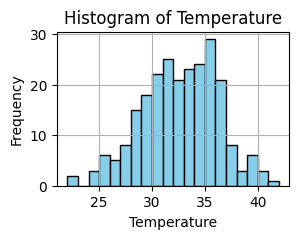

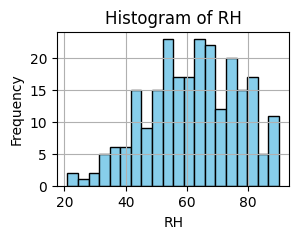

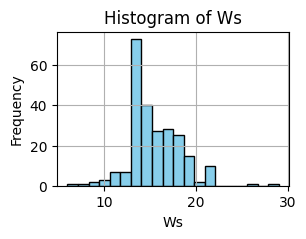

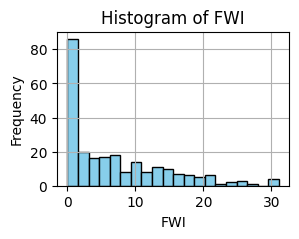

In [120]:
# Plotting histogram for df columns
for column in df.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(3,2))
  plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
  plt.title('Histogram of {}'.format(column))
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.grid(True)
  plt.show()

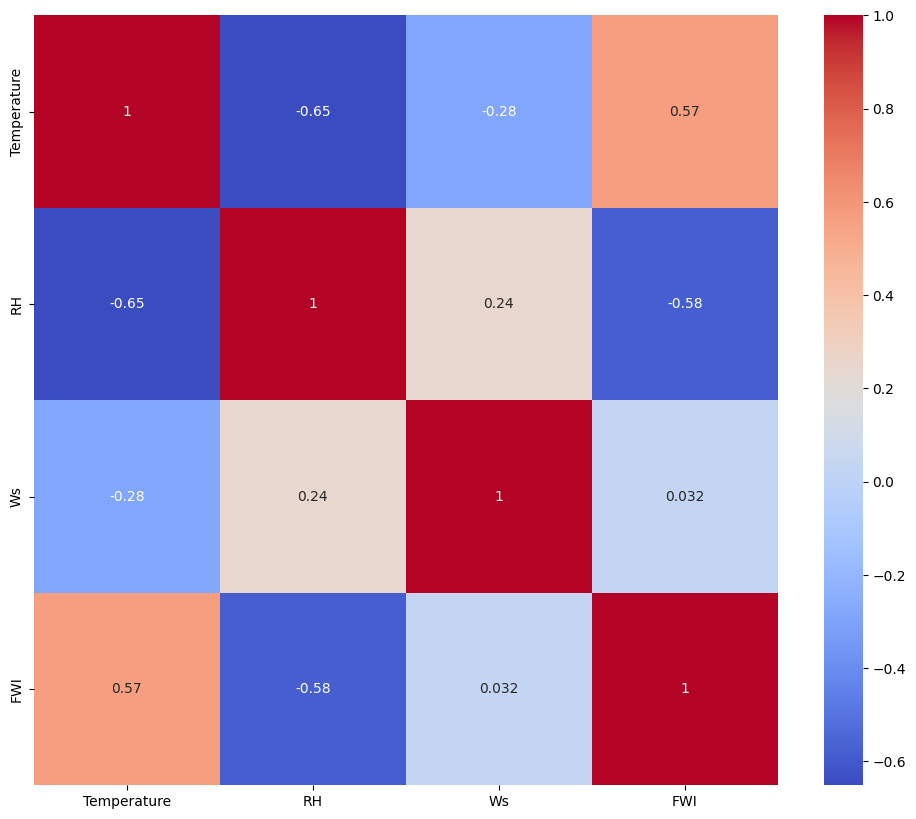

In [121]:
# plotting the correlation between all features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),cmap = "coolwarm", annot= True)
plt.show()

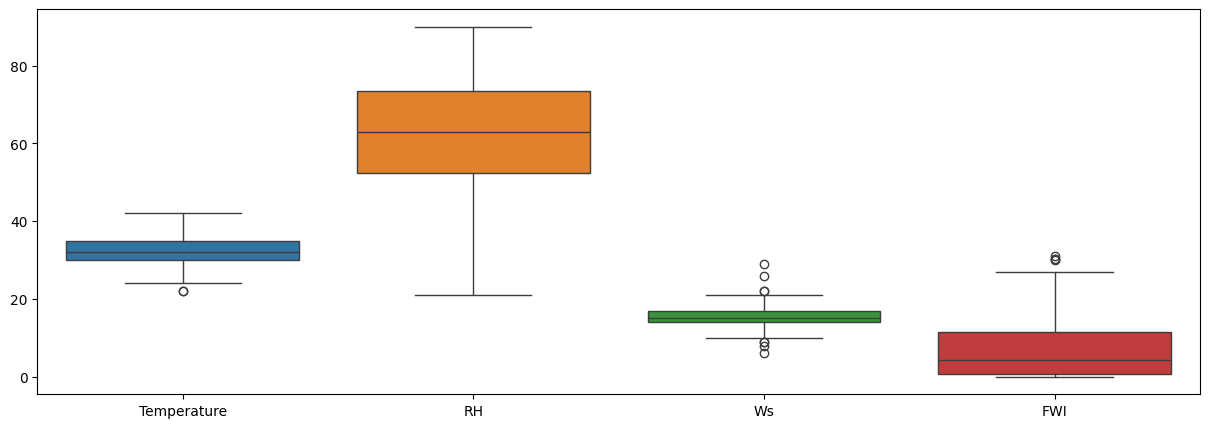

In [122]:
# Plotting boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(data=df)
plt.show()

In [123]:
# creating a function for replacing outliers values with median
def replace_outliers_with_median(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = df[column_name].median()
    # Replace outliers with the median value
    df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = median_value

columns_to_check = ['RH', 'Ws', 'Temperature']

In [124]:
for column in columns_to_check:
    replace_outliers_with_median(df, column)

In [125]:
df.head()

,Temperature,RH,Ws,FWI
0,29,57,18,0.5
1,29,61,13,0.4
2,26,82,15,0.1
3,25,89,13,0.0
4,27,77,16,0.5


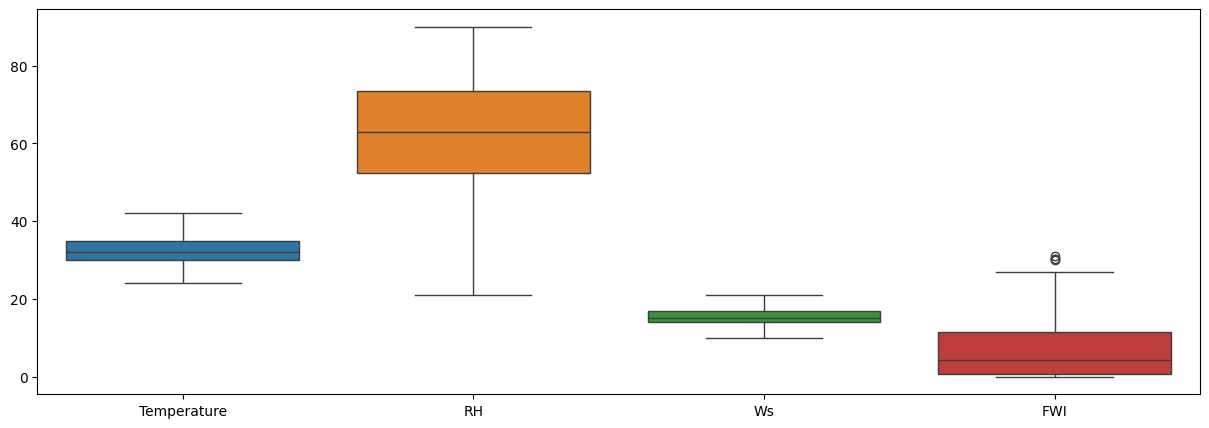

In [126]:
# Plotting boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(data=df)
plt.show()

In [127]:
# Keeping aside 5 records for later evaluation
unseen_records = df.sample(5, random_state=10)

# Removing the unseen records from the dataset
df = df.drop(unseen_records.index)

# Taking the 3 features for our prediction in X dataframe and our dependent variable
X = df[['Temperature', 'RH', 'Ws']]
y = df['FWI']

In [128]:
# data splitting 80 - 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [129]:
# Standarization of data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [130]:
print("Shape of X_train:", X_train_sc.shape)
print("Shape of X_test:", X_test_sc.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (190, 3)
Shape of X_test: (48, 3)
Shape of y_train: (190,)
Shape of y_test: (48,)


In [131]:
# creating linear regression model
lr = LinearRegression()
lr.fit (X_train_sc, y_train)

LinearRegression()

In [132]:
lr.coef_, lr.intercept_

(array([ 2.59638567, -2.66545312,  1.8263064 ]), 6.853684210526317)

In [133]:
y_test_pred = lr.predict(X_test_sc)

In [134]:
print("Metrics for Linear Regression model: ")
MAE = mean_absolute_error(y_test,y_test_pred)
MSE = mean_squared_error(y_test, y_test_pred)
R2 = r2_score(y_test, y_test_pred)
print('MAE: ', MAE)
print('MSE: ',MSE)
print('R2: ', R2)

Metrics for Linear Regression model: 
MAE:  5.067143217902166
MSE:  39.43528105938213
R2:  0.4573271346216302


In [135]:
# Defining the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create Ridge regression model
ridge_model = Ridge()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_sc, y_train)  # Use scaled features

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha for training: ", best_alpha)

Best Alpha for training:  10


In [136]:
# Fit the Ridge model with the best hyperparameters to the scaled training data
Ridge_tunned = Ridge(alpha=best_alpha)
Ridge_tunned.fit(X_train_sc, y_train)

# Predicting using the tunned model
Ridge_pred = Ridge_tunned.predict(X_test_sc)

print("Metric for Tunned Ridge: ")
MAE = mean_absolute_error(y_test,Ridge_pred)
MSE = mean_squared_error(y_test, Ridge_pred)
R2 = r2_score(y_test, Ridge_pred)
print('MAE: ', MAE)
print('MSE: ',MSE)
print('R2: ', R2)

Metric for Tunned Ridge: 
MAE:  5.097252053409141
MSE:  39.801879344342986
R2:  0.45228233878404167


In [137]:
# Defining the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create Lasso regression model
Lasso_model = Lasso()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(Lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_sc, y_train)  # Use scaled features

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha for training: ", best_alpha)

Best Alpha for training:  0.01


In [138]:
# Fit the Lasso model with the best hyperparameters to the scaled training data
Lasso_tunned = Lasso(alpha=best_alpha)
Lasso_tunned.fit(X_train_sc, y_train)

# Predicting using the tunned model
Lasso_pred = Lasso_tunned.predict(X_test_sc)

print("Metric for Tunned Lasso: ")
MAE = mean_absolute_error(y_test,Lasso_pred)
MSE = mean_squared_error(y_test, Lasso_pred)
R2 = r2_score(y_test, Lasso_pred)
print('MAE: ', MAE)
print('MSE: ',MSE)
print('R2: ', R2)

Metric for Tunned Lasso: 
MAE:  5.069084483380975
MSE:  39.45917061495967
R2:  0.45699838804674575


In [139]:
# Defining the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create ElasticNet regression model
Elastic_model = ElasticNet()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(Elastic_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_sc, y_train)  # Use scaled features

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha for training: ", best_alpha)

Best Alpha for training:  0.01


In [140]:
# Fit the Elastic model with the best hyperparameters to the scaled training data
Elastic_tunned = ElasticNet(alpha=best_alpha)
Elastic_tunned.fit(X_train_sc, y_train)

# Predicting using the tunned model
Elastic_pred = Elastic_tunned.predict(X_test_sc)

print("Metric for Tunned ElasticNet: ")
MAE = mean_absolute_error(y_test,Elastic_pred)
MSE = mean_squared_error(y_test, Elastic_pred)
R2 = r2_score(y_test, Elastic_pred)
print('MAE: ', MAE)
print('MSE: ',MSE)
print('R2: ', R2)

Metric for Tunned ElasticNet: 
MAE:  5.071041698166906
MSE:  39.479976430417544
R2:  0.45671207712952266


The three models demonstrate a moderate level of predictive ability, explaining around 45% of the variance in fire intensity.
The Tuned ElasticNet and Linear regression models show a slight improvement over other linear regression models, indicating that the regularization parameter (alpha) used in Elastic regression contributes to a slightly better fit. we would choose ElasticNet for combination of L1 and L2 regularization

In [141]:
# Define hyperparameter space
param_grid = {
    'alpha': np.logspace(-4, 1, 10),  # Regularization strength
    'l1_ratio': np.linspace(0, 1, 10)  # Mix between L1 and L2 regularization
}

# Setup GridSearchCV
grid_search = GridSearchCV(ElasticNet(max_iter=10000), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_sc, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_mse_score = -grid_search.best_score_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.225e+03, tolerance: 7.785e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.305e+03, tolerance: 7.927e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

In [142]:
print("Best parameters:", best_params)
print("Best MSE Score:", best_mse_score)

Best parameters: {'alpha': 0.05994842503189409, 'l1_ratio': 0.0}
Best MSE Score: 29.491570250908307


The hypertuning results indicate that the best parameters for our ElasticNet model are an alpha of approximately 0.0167 and an l1_ratio of 0.0. Notably, an l1_ratio of 0.0 effectively turns the ElasticNet model into a Ridge regression, since ElasticNet is a linear combination of L1 and L2 regularization, and an l1_ratio of 0 means the model is using only L2 regularization.

In [143]:
# Initialize the Ridge model
ridge = Ridge()

# Define hyperparameter space
param_grid = {
    'alpha': np.logspace(-4, 4, 50)  # Exploring a wide range of alpha
}

# Setup GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the model on the scaled training data
grid_search.fit(X_train_sc, y_train)

# Best parameters and scores
best_params = grid_search.best_params_
best_mse_score = -grid_search.best_score_
best_model = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best MSE Score:", best_mse_score)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'alpha': 5.428675439323859}
Best MSE Score: 29.485143818294762


In [144]:
# Initialize the Ridge model with the optimal alpha
ridge_model = Ridge(alpha=grid_search.best_params_['alpha'])

# Fit the model on the scaled training data
ridge_model.fit(X_train_sc, y_train)

Ridge(alpha=5.428675439323859)

In [145]:
# Predict on the scaled training and test sets
ridge_pred = ridge_model.predict(X_test_sc)

In [146]:
print("Metric for Tunned Ridge: ")
MAE = mean_absolute_error(y_test,ridge_pred)
MSE = mean_squared_error(y_test, ridge_pred)
R2 = r2_score(y_test, ridge_pred)
print('MAE: ', MAE)
print('MSE: ',MSE)
print('R2: ', R2)

Metric for Tunned Ridge: 
MAE:  5.083691911031381
MSE:  39.628126160994036
R2:  0.45467337379998596


In [147]:
# Saving the tunned elastic model as pickle file
import pickle
pickle.dump(ridge_model, open('RM.pkl','wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [148]:
def preprocess_data(df):

  # List of columns to keep
  columns_to_keep = ['Ws', 'RH', 'Temperature', 'FWI']

  # Drop all columns except the specified columns
  df = df[df.columns.intersection(columns_to_keep)]

  # Separate independent and dependent variables
  X = df.drop(columns=['FWI'])  # Independent variables
  y = df['FWI']  # Dependent variable

  with open('scaler.pkl', 'rb') as file:
      scaler = pickle.load(file)

  X_scaled = scaler.transform(X)

  return X_scaled, y

In [149]:
# Load the pickled model
pickle_file_path = '/content/RM.pkl'
with open(pickle_file_path, 'rb') as file:
    loaded_model = pickle.load(file)

**Purpose of Pickling and benifits**

1. **Storage**: Pickling is like putting your trained model and data scaler in a sealed container for later use.

2. **Consistency**: It ensures that when you use your model later, it applies the same data transformations it learned during training.

3. **Efficiency**: Saves time and resources by not requiring retraining every time you want to use the model.

4. **Portability**: Easy to move and share your model, making it handy for deployment.
Version Control: Helps keep track of different versions of your model.

5. **Integration**: Compatible with various systems for easy use in applications.

In [150]:
unseen_records.head()

,Temperature,RH,Ws,FWI
46,29,70,14,3.6
225,29,49,19,10.3
180,36,56,16,13.2
116,26,81,21,0.1
124,29,80,14,0.1


In [151]:
desired_order = ['Temperature', 'RH', 'Ws', 'FWI']
unseen_records_ordered = unseen_records.reindex(columns=desired_order)

In [152]:
unseen_records_ordered.head()

,Temperature,RH,Ws,FWI
46,29,70,14,3.6
225,29,49,19,10.3
180,36,56,16,13.2
116,26,81,21,0.1
124,29,80,14,0.1


In [153]:
X_scaled, y = preprocess_data(unseen_records_ordered)

In [154]:
# Display the first few rows of the scaled independent variables
print("Scaled independent variables:")
print(X_scaled[:5])  # Display the first 5 rows

Scaled independent variables:
[[-0.94099387  0.52752486 -0.60818684]
 [-0.94099387 -0.8975423   1.54769935]
 [ 1.07758975 -0.42251991  0.25416763]
 [-1.80610113  1.27398862  2.41005382]
 [-0.94099387  1.20612827 -0.60818684]]


In [155]:
y.head()

46      3.6
225    10.3
180    13.2
116     0.1
124     0.1
Name: FWI, dtype: float64

In [156]:
prediction = loaded_model.predict(X_scaled)

In [157]:
print(prediction)

[ 2.01390103  9.52568654 11.14444519  3.16532464  0.2402904 ]


In [158]:
print("Model evaluation metrics for pickled model: ")
MSE = mean_squared_error(y, prediction)
MAE = mean_absolute_error(y, prediction)
R2 = r2_score(y, prediction)
print('MAE: ', MAE)
print('MSE: ',MSE)
print('R2: ', R2)

Model evaluation metrics for pickled model: 
MAE:  1.5243164554807422
MSE:  3.3512946747157555
R2:  0.8838388835261988


Our analysis demonstrated the effectiveness of the Ridge regression model in predicting outcomes. Initially, with three independent variables, all regression models performed moderately (45%), with elastic net slightly outperforming the others with small margin in accuracy. However, upon hypertunning the elastic model the L1 ratio was zero, effectively turns the ElasticNet model into a Ridge regression.

We then created a Ridge regression model with hypertunning the parameters for finding the best alpha, having a slight increase in the accuracy of the model.

Finally, when trying to predict 5 records saved from the orginal data and removed prior to the splitting and training of the model, we were able to achieve an R2 score of 88.38% suggesting that our model explains about 88.4% of the variance in the target variable based on the input features.
